<a href="https://colab.research.google.com/github/DemitriusBR/Projetos_base_regress-o_linear/blob/main/Regress%C3%A7%C3%A3o_linear1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [6]:
df = pd.read_excel("/content/C├│pia de aprovacao_alunos (1).xlsx")
df

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76
5,Amapa,76,75
6,Tocantins,81,82
7,Maranhao,81,81
8,Piaui,80,81
9,Ceara,86,85


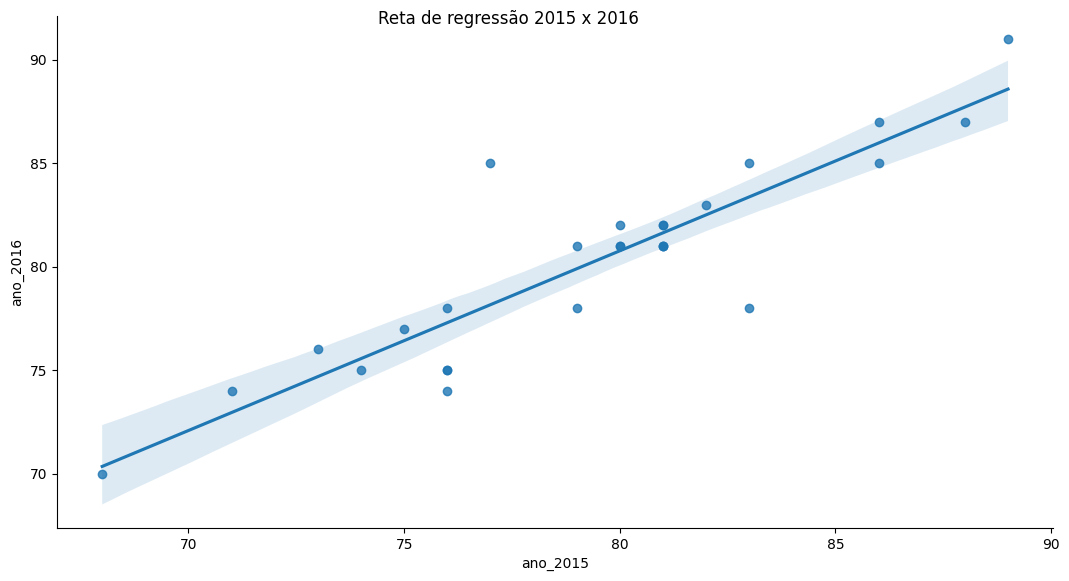

In [9]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de regressão 2015 x 2016");

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [11]:
import statsmodels.api as sm
y = df.ano_2016
x = sm.add_constant(df.ano_2015)

In [12]:
resultado_regressao = sm.OLS(y,x).fit()

In [14]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           3.02e-10
Time:                        13:42:41   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [15]:
df["Y_previsto"] = resultado_regressao.predict()
df.head()

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [16]:
df["residuo"] = df["Y_previsto"] - df["ano_2016"]
df.head()

,UF,ano_2015,ano_2016,Y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
